In [6]:
import numpy as np
import math

## 二项分布

#### 二项分布是指，重复 n 次试验，每次都有一个相同的概率 p 发生某件事，那么计算有 k 次发生事件的概率

### 计算k次发生的概率：
<h3 style="text-align: center;">$ P(x=K)=C_n^kp^k(1-p)^{n-k} $</h3>

#### 其中:

<h3 style="text-align: center;">$ 0 <= k <= n $</h3>

<h3 style="text-align: center;">$C_n^k=\frac{n!}{k! \times (n - k)!}$</h3>

## 问题一

### 抛硬币 3 次，并且 3 次正面朝上的概率是多少？

<p style="color: #E91E63; font-weight: bold; font-size: 16px">解法一：使用乘法定律</p>

In [14]:
p_head = 0.5

n = 3

p = p_head ** n

print(f'3 次正面朝上的概率是: ', p)

3 次正面朝上的概率是:  0.125


<p style="color: #E91E63; font-weight: bold; font-size: 16px">解法二：使用二项分布</p>

<p>抛硬币 3 次，并且 3 次正面朝上, 因此 n = k = 3，正面朝上概率为 0.5，正面没朝上的概率为 0.5，因此代入二项分布公式：</p>

<h3 style="text-align: center;">$ P(x=3)=C_3^30.5^3(1-0.5)^{3-3} $</h3>

<h3 style="text-align: center;">$ =P(x=3)=1\times0.5^3(1-0.5)^{0} $</h3>

In [5]:
n = 3
k = 3

p_head = 0.5

p = 1 * p_head ** k * (1 - p_head) ** (n - k)

print(f'3 次正面朝上的概率是: ', p)

3 次正面朝上的概率是:  0.125


### 定义组合数计算函数

In [11]:
def c_(n, k):
    
    if not (k >= 0 and k <= n) or n < 1:
        raise Exception("Invalid trial numbers")
        
    result = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
    
    return int(result)

In [12]:
c_(3, 3)

1

In [13]:
c_(5, 3)

10

## 问题二

### Monty Hall 问题，总共 13 名参与者，如果有 7 人通过以下 2 种策略能赢得比赛的概率

<p style="color: #7C4DFF; font-weight: bold; font-size: 16px">策略一：不换门</p>

<p style="color: #E91E63; font-weight: bold; font-size: 16px">解法：因为不换门，则获奖的概率为 1/3，不获奖的概率为（1 - 1/3），因此：</p>

<h3 style="text-align: center;">$ P(x=7)=C_{13}^7(\frac{1}{3})^7(1-\frac{1}{3})^{13-7} $</h3>

In [15]:
p_win = 1 / 3

n = 13
k = 7

p = c_(13, 7) * p_win ** k * (1 - p_win) ** (n - k)

print(f'13 人中 7 人不换门赢的比赛的概率: ', p)

13 人中 7 人不换门赢的比赛的概率:  0.06888441049900179


<p style="color: #7C4DFF; font-weight: bold; font-size: 16px">策略二：换门</p>

<p style="color: #E91E63; font-weight: bold; font-size: 16px">解法：因为换门，则获奖的概率为 2/3，不获奖的概率为（1 - 2/3），因此：</p>

<h3 style="text-align: center;">$ P(x=7)=C_{13}^7(\frac{2}{3})^7(1-\frac{2}{3})^{13-7} $</h3>

In [16]:
p_win = 2 / 3

n = 13
k = 7

p = c_(13, 7) * p_win ** k * (1 - p_win) ** (n - k)

print(f'13 人中 7 人换门赢的比赛的概率: ', p)

13 人中 7 人换门赢的比赛的概率:  0.13776882099800358


### 定义二项分布概率计算函数

In [17]:
def bino_p(n, k, p_happen):
    
    return c_(n, k) * p_happen ** k * (1 - p_happen) ** (n - k)

In [18]:
p_win = 2 / 3

n = 13
k = 7

bino_p(n, k, p_win)

0.13776882099800358

### 二项分布概率公式告诉我们，以特定概率发生的事件，在 n 次实验中发生 k 次的概率是多少

#### 如果 n = 5， p_happen = 0.3，那可以计算出 k 在 [0, 5] 中的所有概率，并且这些概率的和 = 1

In [21]:
n = 5

p_happen = 0.3

p_k = [bino_p(n, k, p_happen) for k in range(0, n + 1)]

print("k 在 [0, 5] 中成功的所有概率为：\n", p_k)
print("所有概率和为：", sum(p_k))

k 在 [0, 5] 中成功的所有概率为：
 [0.16806999999999994, 0.3601499999999999, 0.3086999999999999, 0.13229999999999997, 0.028349999999999993, 0.0024299999999999994]
所有概率和为： 0.9999999999999999


### 这些概率值构成了:

<h2 style="text-align: center">概率质量函数 - Probability Mass Function</h2>

In [22]:
import matplotlib.pyplot as plt

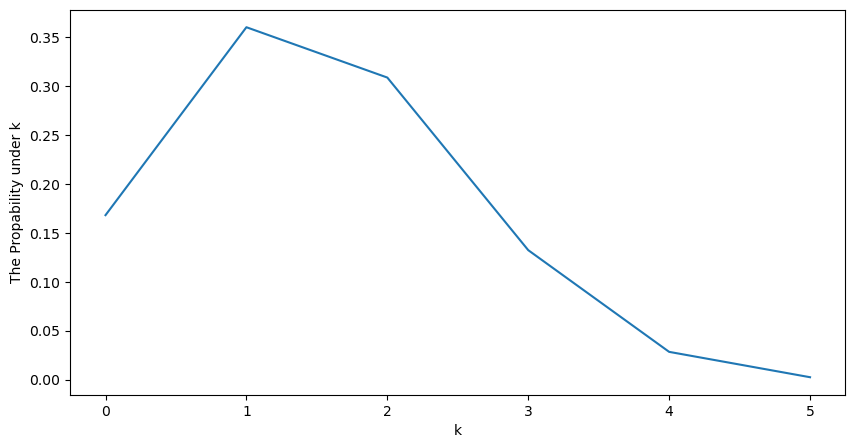

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(p_k)
plt.xlabel('k')
plt.ylabel('The Propability under k')
plt.show()

In [29]:
t = np.random.binomial(n = 5, p = 0.3, size = 1000)
s = np.bincount(t)
s

array([175, 363, 296, 129,  35,   2])

In [30]:
s / s.sum()

array([0.175, 0.363, 0.296, 0.129, 0.035, 0.002])

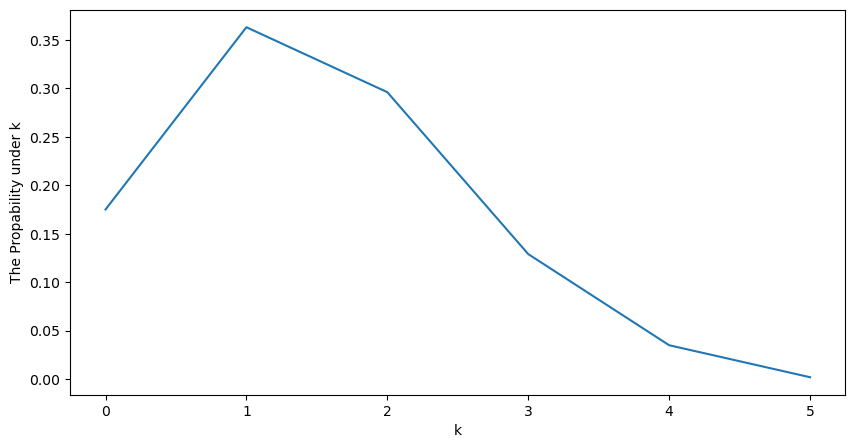

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(s / s.sum())
plt.xlabel('k')
plt.ylabel('The Propability under k')
plt.show()